In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
# Step 3 load dataset

iris = load_iris()
x = iris.data
y = iris.target

# Step 4 preprocess the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Standardizet the features

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
                         
# Step5 fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

# make prediction

y_pred = lda.predict(x_test)

#Step 6 Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy = ", accuracy)
print("Confusion Matrix = \n", conf_matrix)

Accuracy =  1.0
Confusion Matrix = 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


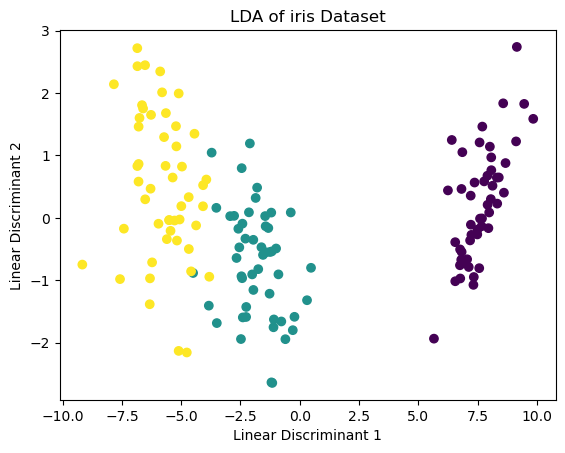

In [13]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

iris = load_iris()
x = iris.data
y = iris.target

# Apply LDA
lda  = LDA(n_components = 2)
x_lda = lda.fit_transform(x, y)

# plot LDA result

plt.scatter(x_lda[:, 0], x_lda[:, 1], c = y)
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA of iris Dataset")
plt.show()


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

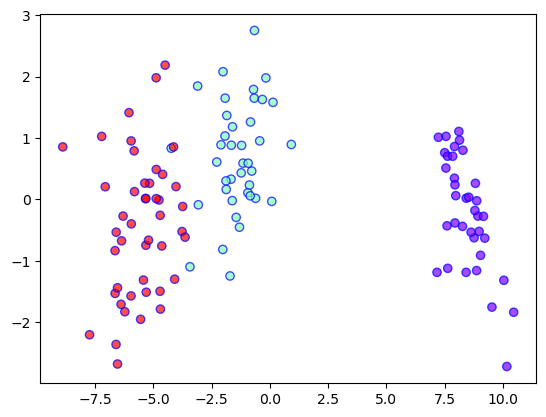

In [23]:
iris = load_iris()
dataset = pd.DataFrame(columns = iris.feature_names, data = iris.data)
dataset['target'] = iris.target

# divide dataset into class and target variables
x = dataset.iloc[:, 0:4]. values
y = dataset.iloc[:, 4].values

# preprocess the data
sc = StandardScaler()
x = sc.fit_transform(x)
le = LabelEncoder()
y = le.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# apply LDA

lda = LinearDiscriminantAnalysis(n_components = 2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

# plot LDA
plt.scatter(x_train[:, 0], x_train[: ,1], c =y_train, cmap = "rainbow", alpha = 0.7, edgecolors = 'b')
plt.show()

In [26]:
# classify using random forest
classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

#print the accuracy and confusion matrix
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy: 0.9666666666666667
[[14  0  0]
 [ 0 11  0]
 [ 0  1  4]]
